In [1]:
#Importing necessary dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

## Exploratory data analysis 
First we will try to find the missing values and we will try to find relationship between different features and we will also visualize the data and see the relationship between them.


In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
#Describe the data
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Since there is only one numerical feature we will try to analyze the categorical data and see the relationship with the price

In [7]:
feature_categorical=[feature for feature in df.columns if df[feature].dtypes=='O']
feature_categorical

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [8]:
df.dropna(inplace=True)

## Lets change the date time format

In [9]:
#train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
df['Day_of_Journey']=pd.to_datetime(df['Date_of_Journey']).dt.day
df['Journey_Month']=pd.to_datetime(df['Date_of_Journey']).dt.month

In [10]:
# Now we will extract the hour and minutes in Arrival time
df["Arrival_hour"]=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Journey_Month,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,21,35


In [11]:
df.drop(['Date_of_Journey','Arrival_Time'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Journey_Month,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,5,1,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,6,9,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,5,12,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,3,1,21,35


In [12]:
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'],inplace=True,axis=1)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Journey_Month,Arrival_hour,Arrival_minute,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,21,35,16,50


In [13]:
duration=list(df['Duration'])
duration[0].split(" ")

['2h', '50m']

In [14]:
for num in range(len(duration)):
    if len(duration[num].split(" "))!=2:
        if 'h' in duration[num]:
            duration[num]=duration[num].strip()+'0m'
        else:
            duration[num]='0h'+duration[num]
            
duration_hour=[]
duration_min=[]
for num in range(len(duration)):
    duration_hour.append(int(duration[num].split("h")[0]))
    duration_min.append(int(duration[num].split("h")[1].split('m')[0].strip()))

In [15]:
df['Duration_hour']=duration_hour
df['Duration_min']=duration_min
df.drop('Duration',axis=1,inplace=True)

In [16]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Journey_Month,Arrival_hour,Arrival_minute,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,21,35,16,50,4,45


# Handling the categorical data

In [17]:
airway=df['Airline']

In [18]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

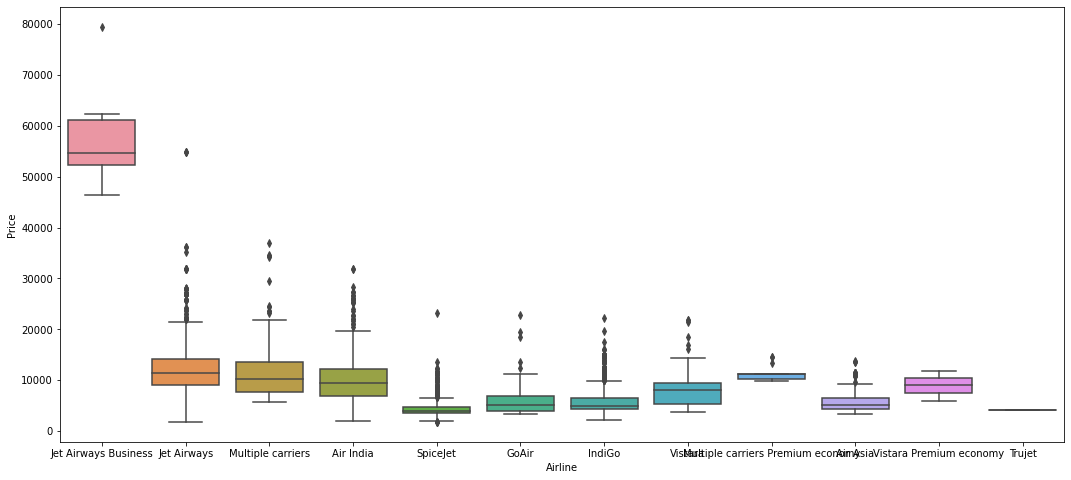

In [19]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))



# Encoding categorical data into numerical
Since the airlines are not ordinal we will one hot encode the data using get dummies function in pandas

In [20]:
Airline=pd.get_dummies(df['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [21]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

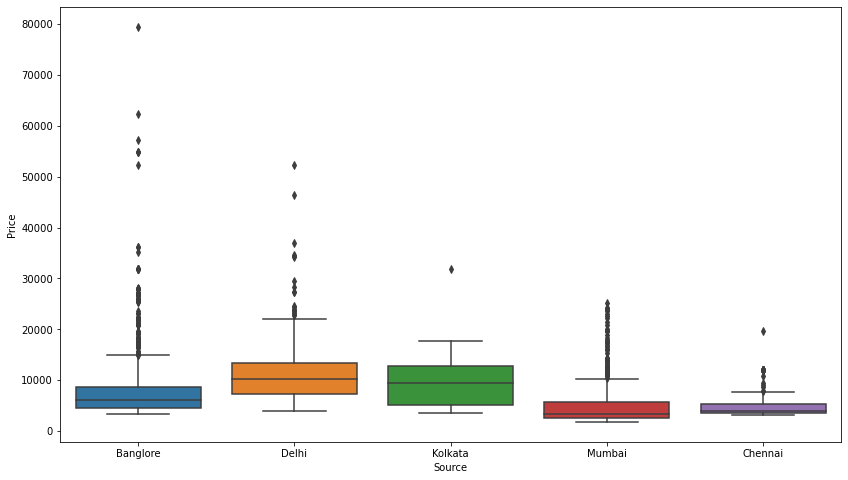

In [22]:
# Source vs Price
plt.figure(figsize=(14,8))
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

In [23]:
# Now we one hot encode the source feature using same method used above
Source=df['Source']
Source=pd.get_dummies(Source,drop_first=False)
Source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [24]:
Destination=df['Destination']
Destination=pd.get_dummies(Destination,drop_first=False)

In [25]:
Destination=Destination.rename(columns={"Banglore":"Dest_Banglore",'Cochin':'Dest_Cochin',"Delhi":'Dest_Delhi','Hyderabad':'Dest_Hyderabad',"Kolkata":'Dest_Kolkata','New Delhi':'Dest_NewDelhi'})

In [26]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Journey_Month,Arrival_hour,Arrival_minute,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,21,35,16,50,4,45


In [27]:
df["Route"].head()

0                BLR → DEL
1    CCU → IXR → BBI → BLR
2    DEL → LKO → BOM → COK
3          CCU → NAG → BLR
4          BLR → NAG → DEL
Name: Route, dtype: object

In [28]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [29]:
# Since the route is related to no of stops we can drop that feature
# Now we can change no of stops using ordinal encoding since it is ordinal data
df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [30]:
# Since the Airline, Source and Destination are one hot encoded and
# we can determine the route by seeing the no of stops we can drop those features
df.drop(['Airline','Source','Destination','Route'],inplace=True,axis=1)
df.head()

,Total_Stops,Additional_Info,Price,Day_of_Journey,Journey_Month,Arrival_hour,Arrival_minute,Dep_hour,Dep_min,Duration_hour,Duration_min
0,0,No info,3897,24,3,1,10,22,20,2,50
1,2,No info,7662,5,1,13,15,5,50,7,25
2,2,No info,13882,6,9,4,25,9,25,19,0
3,1,No info,6218,5,12,23,30,18,5,5,25
4,1,No info,13302,3,1,21,35,16,50,4,45


In [31]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

## Since the Addtional_info has lot of no info we can actually drop this feature

In [32]:
df.drop('Additional_Info',axis=1,inplace=True)
df.head()

,Total_Stops,Price,Day_of_Journey,Journey_Month,Arrival_hour,Arrival_minute,Dep_hour,Dep_min,Duration_hour,Duration_min
0,0,3897,24,3,1,10,22,20,2,50
1,2,7662,5,1,13,15,5,50,7,25
2,2,13882,6,9,4,25,9,25,19,0
3,1,6218,5,12,23,30,18,5,5,25
4,1,13302,3,1,21,35,16,50,4,45


In [33]:
df_concat=pd.concat([df,Airline,Source,Destination],axis=1)
df_concat.head()

,Total_Stops,Price,Day_of_Journey,Journey_Month,Arrival_hour,Arrival_minute,Dep_hour,Dep_min,Duration_hour,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Dest_Banglore,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_NewDelhi
0,0,3897,24,3,1,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,13,15,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,6,9,4,25,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,5,12,23,30,18,5,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,13302,3,1,21,35,16,50,4,45,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


# Let's repeat above for the test data

In [34]:
df_test=pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [35]:
# duration=list(df['Duration'])
# duration[0].split(" ")
# for num in range(len(duration)):
#     if len(duration[num].split(" "))!=2:
#         if 'h' in duration[num]:
#             duration[num]=duration[num].strip()+'0m'
#         else:
#             duration[num]='0h'+duration[num]
            
# duration_hour=[]
# duration_min=[]
# for num in range(len(duration)):
#     duration_hour.append(int(duration[num].split("h")[0]))
#     duration_min.append(int(duration[num].split("h")[1].split('m')[0].strip()))
    
# df_test['Duration_hour']=duration_hour
# df_test['Duration_min']=duration_min
# df_test.drop('Duration',axis=1,inplace=True)
# Airline=pd.get_dummies(df_test['Airline'],drop_first=True)
# # Now we one hot encode the source feature using same method used above
# Source=df_test['Source']
# Source=pd.get_dummies(Source,drop_first=False)
# Destination=df['Destination']
# Destination=pd.get_dummies(Destination,drop_first=False)
# Since the route is related to no of stops we can drop that feature
# Now we can change no of stops using ordinal encoding since it is ordinal data
# df_test['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
# df_test.drop(['Airline','Source','Destination','Route'],inplace=True,axis=1)
# df_test.drop('Additional_Info',axis=1,inplace=True)
# df_concat1=pd.concat([df_test,Airline,Source,Destination],axis=1)

In [36]:
df_test['Day_of_Journey']=pd.to_datetime(df_test['Date_of_Journey']).dt.day
df_test['Journey_Month']=pd.to_datetime(df_test['Date_of_Journey']).dt.month
# Now we will extract the hour and minutes in Arrival time
df_test["Arrival_hour"]=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_minute']=pd.to_datetime(df_test['Arrival_Time']).dt.minute
df_test.drop(['Date_of_Journey','Arrival_Time'],axis=1,inplace=True)
df_test['Dep_hour']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute
duration=list(df_test['Duration'])
duration[0].split(" ")
for num in range(len(duration)):
    if len(duration[num].split(" "))!=2:
        if 'h' in duration[num]:
            duration[num]=duration[num].strip()+'0m'
        else:
            duration[num]='0h'+duration[num]
            
duration_hour=[]
duration_min=[]
for num in range(len(duration)):
    duration_hour.append(int(duration[num].split("h")[0]))
    duration_min.append(int(duration[num].split("h")[1].split('m')[0].strip()))
    
df_test['Duration_hour']=duration_hour
df_test['Duration_min']=duration_min
df_test.drop('Duration',axis=1,inplace=True)
Airline=pd.get_dummies(df_test['Airline'],drop_first=True)
# Now we one hot encode the source feature using same method used above
Source=df_test['Source']
Source=pd.get_dummies(Source,drop_first=False)
Destination=df_test['Destination']
Destination=pd.get_dummies(Destination,drop_first=False)
Destination=Destination.rename(columns={"Banglore":"Dest_Banglore",'Cochin':'Dest_Cochin',"Delhi":'Dest_Delhi','Hyderabad':'Dest_Hyderabad',"Kolkata":'Dest_Kolkata','New Delhi':'Dest_NewDelhi'})
# Since the route is related to no of stops we can drop that feature
# Now we can change no of stops using ordinal encoding since it is ordinal data
df_test['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df_test.drop(['Airline','Source','Destination','Route'],inplace=True,axis=1)
df_test.drop(['Additional_Info','Dep_Time'],axis=1,inplace=True)
df_concat1=pd.concat([df_test,Airline,Source,Destination],axis=1)

In [37]:
df_concat1.head()

,Total_Stops,Day_of_Journey,Journey_Month,Arrival_hour,Arrival_minute,Dep_hour,Dep_min,Duration_hour,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Dest_Banglore,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_NewDelhi
0,1,6,6,4,25,17,30,10,55,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,5,12,10,20,6,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,0,19,15,23,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,2,50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [38]:
df_concat.head()

,Total_Stops,Price,Day_of_Journey,Journey_Month,Arrival_hour,Arrival_minute,Dep_hour,Dep_min,Duration_hour,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Dest_Banglore,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_NewDelhi
0,0,3897,24,3,1,10,22,20,2,50,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,13,15,5,50,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,6,9,4,25,9,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,5,12,23,30,18,5,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,13302,3,1,21,35,16,50,4,45,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [48]:
df_concat1.head()

,Total_Stops,Day_of_Journey,Journey_Month,Arrival_hour,Arrival_minute,Dep_hour,Dep_min,Duration_hour,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Dest_Banglore,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_NewDelhi
0,1,6,6,4,25,17,30,10,55,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,5,12,10,20,6,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,0,19,15,23,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,2,50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [40]:
df_concat.shape

(10682, 32)

In [41]:
df_test['Dep_min']

0       30
1       20
2       15
3        0
4       55
        ..
2666    30
2667    20
2668    50
2669     0
2670    55
Name: Dep_min, Length: 2671, dtype: int64

In [62]:
Xtr=df_concat.drop(['Price','Trujet'],axis=1)
Ytr=df["Price"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Xtr,Ytr,test_size=0.2,random_state=5)
x_test.shape

(2137, 30)

In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(8545, 30)
(2137, 30)
(8545,)


In [64]:
from xgboost import XGBRegressor
model=XGBRegressor()

In [65]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
y_pre=model.predict(x_test)
y_pre

array([12495.186 ,  4279.8115,  7704.2144, ...,  4730.579 ,  3264.8237,
        3811.099 ], dtype=float32)

In [74]:
y_test

2519     10844
10237     3383
6949      6795
5415     14714
125      10676
         ...  
10148     7398
6100      6144
6704      5644
8355      3100
10342     3873
Name: Price, Length: 2137, dtype: int64

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred=y_pre)

0.8593689694513444

In [70]:
model.predict(df_concat1)

array([11668.621 ,  4244.5024, 14374.508 , ..., 16183.944 , 11834.336 ,
        8480.666 ], dtype=float32)

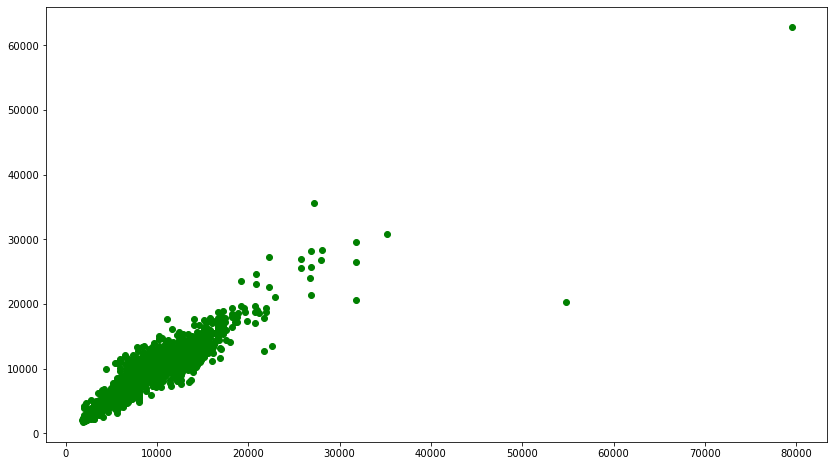

In [86]:
plt.figure(figsize=(14,8))
plt.scatter(y_test,y_pre,color='g')